In [1]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells
import os
import re
from scipy.signal import find_peaks

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

#  Semiconductor Diodes

Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

***Task 1***

Measure the current-voltage characteristics of a Si diode, a Zener diode and a light-emitting-diode (LED). Plot the current-voltage characteristics in one diagram.

***Task 2***

- For the Si diode, determine the emission coefficient by linear regression in the $log(I)-U$ diagram.
- For the Zener diode, determine the breakdown voltage as well as the direct current resistance R and the differential resistance $r_d$ for a current of $0.2 I_{Z,max}$. 
- For the LED determine the threshold voltage by regression of the linear part of the current-voltage characteristic. From the threshold voltage estimate the average emitted wavelength and compare the result with your observations.

***Task 3***

Measure the junction capacitance of a Si power diode as a function of the reverse bias voltage using a resonance technique. Determine the thickness of the depletion layer for vanishing reverse bias voltage.


In [2]:
# GLOBALS
data_dir='./data/'
#L = 

## Task 2

***Task Definition*** 

Measure the time traces and frequency spectra of the free beat oscillations of the high-point circuit for ten different coupling capacitance values. Plot the ten frequency spectra into one graph. Determine the frequencies of the in-phase and out-of-phase oscillation modes. Calculate the coupling factors from the measured frequencies. Fit the theoretical expressions
to the data to determine the value of the capacitance $C$.


Coupling factor:

$$k_{C,H} = \frac{\omega_-^2 -\omega_+^2}{\omega_-^2 + \omega_+^2} = \frac{C_K}{C + C_K}$$

In [3]:
# Data Preprocessing
task_dir = data_dir + 'Task2/csv/'
data_count = 0
C_k_l = [] # capacitance in Farads
C_k_str_l = []
df_l = []

for path in os.listdir(task_dir):
    s = re.findall('.*pF', path)[0]
    C_k_str_l.append(s)
    r = float(''.join(s[:-2]))
    C_k_l.append(r*1e-9) # pF to F
    df = pd.read_csv(task_dir + path, delimiter=';', skiprows=1, dtype=np.float64, decimal=',')
    df.columns = ['Frequency', 'Voltage'] 
    df_l.append(df)

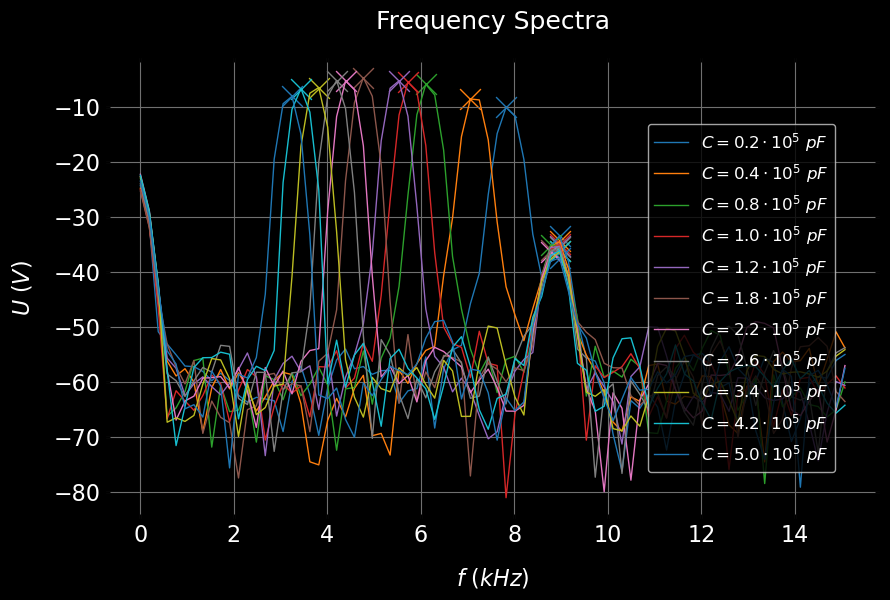

<IPython.core.display.Latex object>

In [4]:
f_in_l = [] # in kHz
f_out_l = [] # in kHz
w_in_l = [] # in rad * Hz
w_out_l = [] # in rad * Hz
for i in range(len(C_k_l)):
    
    label_s = r'$C = %s \cdot 10^{%s} ~pF$' % (C_k_str_l[i][:-4], C_k_str_l[i][-3])
    
    x = np.array(df_l[i]['Frequency'])
    y = np.array(df_l[i]['Voltage'])
    
    peaks, _ = find_peaks(y[:80], height=-40)
    f_in_l.append(x[peaks][0])
    f_out_l.append(x[peaks][1])
    w_in_l.append(x[peaks][0]*1e3*2*np.pi)
    w_out_l.append(x[peaks][1]*1e3*2*np.pi)
    
    plt.scatter(x[peaks], y[peaks], marker='x')
    plt.plot(x[:80], y[:80], label=label_s)
    
plt.title(r'Frequency Spectra')
plt.xlabel(r'$f$ ($kHz$)')
plt.ylabel(r'$U$ ($V$)')
plt.legend(loc=(0.7,0.1))
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 2.1$: Frequency spectra plot of ten measurements of high-point circuit.'))

In [5]:
def k_fit(c_k_arg, c_arg):
    return c_k_arg/(c_k_arg + c_arg)

In [6]:
w_in_arr = np.array(w_in_l)
w_out_arr = np.array(w_out_l)
k_l_arr = (w_out_arr**2 - w_in_arr**2)/(w_out_arr**2 + w_in_arr**2)
fit = curve_fit(k_fit, np.array(C_k_l), k_l_arr)
C = fit[0][0]
u_C = np.sqrt(fit[1][0][0])
dy(Lx(r'$C = (%.2f \pm %.3f) ~\mu F$' % (C*1e6, u_C*1e6)))

<IPython.core.display.Latex object>

## Task3

***Task Definition*** 

Measure the beat period of the high-point circuit for one selected coupling factor. Compare the values to those obtained from the frequencies of the in-phase and out-of-phase oscillation modes. Make plots of both the time trace and the spectrum.

***Procedure***

## References

1) [E14e Lab instruction](https://moodle2.uni-leipzig.de/pluginfile.php/3621565/mod_resource/content/1/E14e_2024.pdf)